# Orbital inflation as in ArXiv:1901.03657

In [1]:
import numpy as np
import sympy
from inflatox import (SymbolicCalculation, Compiler, consistency_conditions)
sympy.init_printing()

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


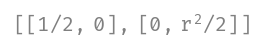

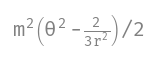

In [3]:
r, θ, m = sympy.symbols('r θ m')
fields = [r, θ]

potential = (1/2*m**2*(θ**2-2/(3*r**2))).nsimplify()
metric = [
  [sympy.Rational(1,2), 0],
  [0, (0.5*r**2).nsimplify()]
]

display(metric, potential)

In [4]:
hesse = SymbolicCalculation.new_from_list(
  fields,
  metric,
  potential,
  simplify_for='length'
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
out = Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
r -> x[0]
θ -> x[1]
m -> args[0]


In [6]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)
args = np.array([1.0])

In [7]:
r_start, r_stop = 0.01, 3.0
θ_start, θ_stop = 0.0, 4*np.pi
N_r, N_θ = 5000, 5000

pot_calc = anguelova.calc_V_array(
  args,
  [r_start, θ_start],
  [r_stop, θ_stop],
  [N_r, N_θ]
)

/tmp/ipykernel_20465/3310148463.py:7: RuntimeWarning: invalid value encountered in log10
  V = np.log10(np.transpose(pot_calc))
/tmp/ipykernel_20465/3310148463.py:42: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=10
/home/raulwolters/Documents/inflatox/.venv/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


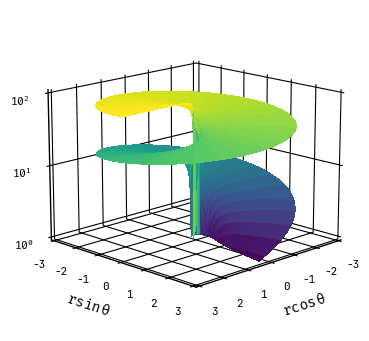

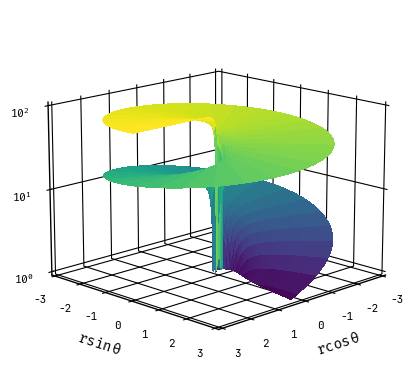

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=MAIN_FIG(1))
rs = np.linspace(r_start, r_stop, N_r)
θs = np.linspace(θ_start, θ_stop, N_θ)
rs, θs = np.meshgrid(rs, θs)

xs, ys = rs*np.cos(θs), rs*np.sin(θs)
V = np.log10(np.transpose(pot_calc))
V[np.where(V < 0.0)] = np.NaN

ax.plot_surface(
  xs,
  ys,
  V,
  linewidth=0,
  antialiased=False,
  cmap='viridis'
)

ax.set_xlabel(f'$r\\cos\\theta$')
ax.set_ylabel(f'$r\\sin\\theta$')
ax.set_zlabel(f'$V({sympy.latex(fields[0])},{sympy.latex(fields[1])})$')

ax.set_xlim(-r_stop, r_stop)
ax.set_ylim(-r_stop, r_stop)
ax.set_zlim(0.0, 2.0)

ax.set_zticks(
  [x for x in range(0, 3)],
  [f'$10^{x}$' for x in range(0,3)]
)

wit, zwart = (1.0, 1.0, 1.0, 0.0), (0.0, 0.0, 0.0, 1.0)
ax.xaxis.set_pane_color(wit)
ax.yaxis.set_pane_color(wit)
ax.zaxis.set_pane_color(wit)

ax.xaxis._axinfo["grid"]['color'] = zwart
ax.yaxis._axinfo["grid"]['color'] = zwart
ax.zaxis._axinfo["grid"]['color'] = zwart

ax.view_init(15, 45)
ax.dist=10

#fig.savefig('../out/orbital_plot.svg', transparent=True)
fig

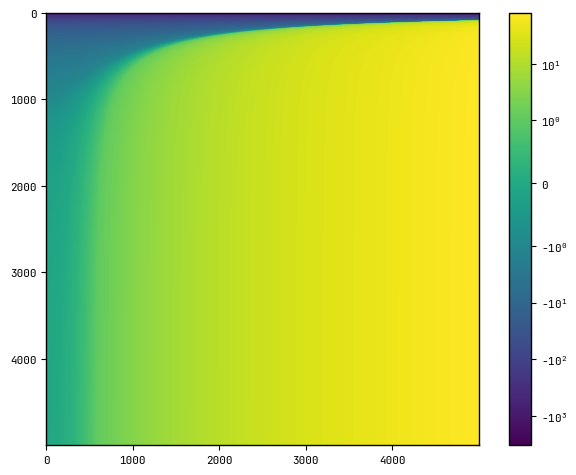

In [9]:
plt.imshow(pot_calc, norm=mpl.colors.SymLogNorm(1))
plt.colorbar()

In [10]:
extent2 = (0.0, 2.5, 0.0, 2.5)
array2 = anguelova.evaluate(args, *extent2)
extent3 = (0.0, 1.0, 0, 40)
array3 = anguelova.evaluate(args, *extent3, N_x0=12_500, N_x1=25_000)

/tmp/ipykernel_20465/423931749.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('../out/orbital_zoomed.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)


/tmp/ipykernel_20465/423931749.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/raulwolters/Documents/inflatox/.venv/lib64/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/raulwolters/Documents/inflatox/.venv/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


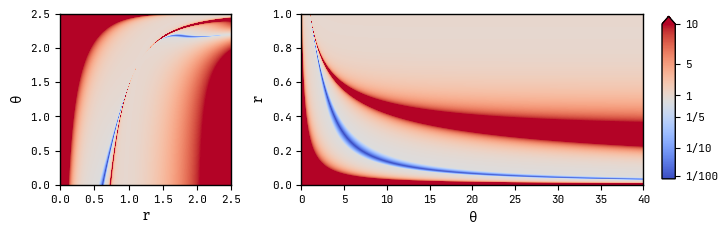

In [11]:
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(cmap(1.0))

fig, (ax1, ax2) = plt.subplots(1,2,
  figsize=FULL_FIG(0.5),
  width_ratios=[1, 2]
)

img = ax1.imshow(
  np.transpose(array2),
  extent=extent2,
  cmap=cmap,
  norm=two_norm
)

img = ax2.imshow(
  array3,
  extent=(0, 40, 0, 1),
  cmap=cmap,
  norm=two_norm,
  aspect=f'{40/2}',
  origin='lower'
)

#Make colorbar
ax3 = fig.add_axes([
  ax2.get_position().x1+0.1,
  ax2.get_position().y0,
  0.02,
  ax2.get_position().height+0.02
], frameon=True)
plt.colorbar(
  img,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=ax3
)
ax3.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

ax1.set_xlabel(f'${sympy.latex(fields[0])}$')
ax1.set_ylabel(f'${sympy.latex(fields[1])}$')
ax2.set_xlabel(f'${sympy.latex(fields[1])}$')
ax2.set_ylabel(f'${sympy.latex(fields[0])}$')

fig.savefig('../out/orbital_zoomed.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig.show()